In [1]:
# pip install --user yfinance

In [2]:
# pip install --user yahoo_fin

In [3]:
# pip install pandas-datareader

In [4]:
start='2018-7-11'
end  ='2020-9-15'
# data_source = 'yahoo'

In [5]:
# from pandas_datareader import data
import yfinance as yf
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


### VOO example

In [6]:
VOO = yf.Ticker("VOO")
VOO = VOO.history(start=start, end=end)
VOO.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-11,244.58,245.36,244.03,244.38,2335100,0.0,0
2018-07-12,245.60,246.56,244.97,246.47,2874000,0.0,0
2018-07-13,246.39,247.04,245.91,246.68,1814500,0.0,0
2018-07-16,246.78,246.89,246.08,246.53,993500,0.0,0


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


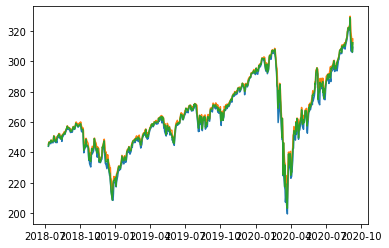

In [7]:
plt.plot(VOO['Low'])
plt.plot(VOO['High'])
plt.plot(VOO['Close'])

# EDA

2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00
2018-07-11 00:00:00 2020-09-09 00:00:00


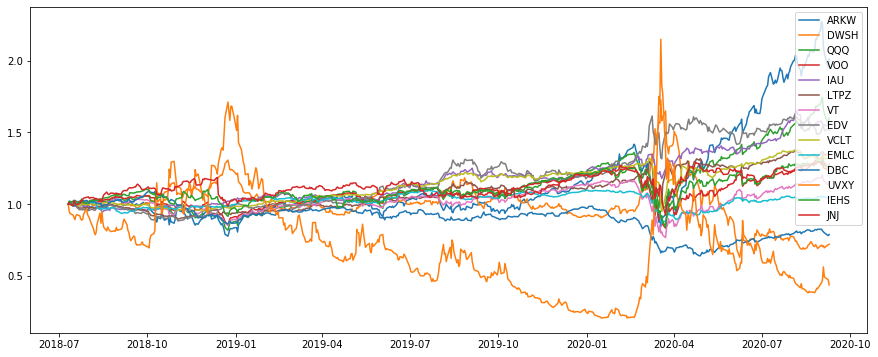

In [8]:
list_of_ETF_names =         ['ARKW','DWSH','QQQ','VOO','IAU','LTPZ', 'VT','EDV','VCLT','EMLC','DBC','UVXY','IEHS','JNJ']
asset_fraction_RayDalio =   [   0.0,   0.0,  0.0,  0.0, 0.05,   0.2, 0.35,  0.2, 0.075, 0.075, 0.05,   0.0,   0.0,  0.0]
asset_fraction_Preliminary= [   1.0,   1.0,  1.0,  1.0,  1.0,   1.0,  0.0,  0.0,   0.0,   0.0,  0.0,   0.0,   0.0,  0.0]
asset_fraction_Preliminary = np.array(asset_fraction_Preliminary)/np.sum(asset_fraction_Preliminary)

list_of_ETFs = []

for ETF_names in list_of_ETF_names:
  tmp = yf.Ticker(ETF_names)
  list_of_ETFs.append(tmp.history(start=start, end=end).copy())

plt.figure(figsize=(15,6))
for item in list_of_ETFs:
  print(item.index[0], item.index[-1])
#   print(item['Date'][0])
  plt.plot(item['Close']/item['Close'][0])
plt.legend(list_of_ETF_names)

In [9]:
def get_index(ETFname):
  for i,name in enumerate(list_of_ETF_names):
    if name==ETFname:
      return i

### TEST: Prilimirary portfolio vs Raydalio All weather

In [10]:
def get_portfolio(asset_fraction):

  portfolio = pd.DataFrame(list_of_ETFs[0]['Close'].copy())
  portfolio['Close'] = 10000.0
  
  asset_value = portfolio.iloc[0]['Close']
  for iDate in range(1,len(portfolio['Close'])):
    asset_value = portfolio.iloc[iDate-1]['Close']
    asset_value_change = 0
    for iETF,ETF in enumerate(list_of_ETFs):
      changes_ratio = ETF.iloc[iDate]['Close']/ETF.iloc[iDate-1]['Close'] - 1.0
      asset_value_change = asset_value_change + asset_value*asset_fraction[iETF]*changes_ratio
      asset_value_change = asset_value_change + asset_value*asset_fraction[iETF]/ETF.iloc[iDate]['Close']*ETF.iloc[iDate]['Dividends']
    asset_value = asset_value + asset_value_change
    portfolio.iloc[iDate]['Close'] = asset_value

  return portfolio

In [11]:
portfolio_RayDalio = get_portfolio(asset_fraction_RayDalio)
portfolio_Preliminary = get_portfolio(asset_fraction_Preliminary)

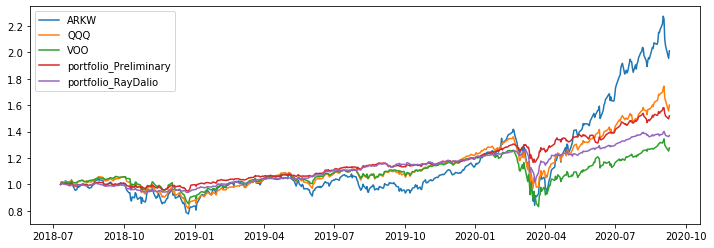

In [12]:
plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close']/item['Close'][0])

plt.plot(portfolio_Preliminary['Close']/portfolio_Preliminary['Close'][0])
plt.plot(portfolio_RayDalio['Close']/portfolio_RayDalio['Close'][0])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio'])

In [13]:
def get_linear_model(asset_hist):
  n_days = len(asset_hist)
  momentum = (asset_hist[-1]/asset_hist[0]-1.0)/n_days
  diff = asset_hist/asset_hist[0] - momentum*range(n_days)
  return momentum, diff


# performace_measure_duration = 60 ~ approximate 3 month
# tolarable volatility / momentum = 0.7

def get_portfolio_performance_based_on_linear_model(asset_fraction):
  asset_fraction_tmp = np.array(asset_fraction)
  asset_fraction_tmp = asset_fraction_tmp/np.sum(asset_fraction_tmp)
  portfolio = get_portfolio(asset_fraction_tmp)
  Momentum = []
  volatility = []
  for i in range(len(portfolio['Close'] -21)):
    tmp = portfolio['Close'][i:i+21]
    p, diff = get_linear_model(tmp)
    std = np.std(diff)
    Momentum.append(p)
    volatility.append(std)

  return np.array(Momentum) - 0.7*np.array(volatility)

In [14]:
# Exponential Moving Average (EMA)
s = 2.0 # smoothing param
d = 60  # averaging duration

def get_EMA(asset_hist):
  EMA = [np.mean(asset_hist[0:d])]
  for i in range(d,len(asset_hist)):
    EMA.append(asset_hist[i]*s/(1.0+d) + EMA[-1]*(1.0-s/(1.0+d)))
  
  return pd.Series(EMA,index=asset_hist.index[d-1:])

In [15]:
EMAs = {'ARKW':get_EMA(list_of_ETFs[get_index('ARKW')]['Close']),
        'QQQ' :get_EMA(list_of_ETFs[get_index('QQQ' )]['Close']),
        'VOO' :get_EMA(list_of_ETFs[get_index('VOO' )]['Close']),
        'Preliminary':get_EMA(portfolio_Preliminary['Close']),
        'RayDalio':get_EMA(portfolio_RayDalio['Close'])}

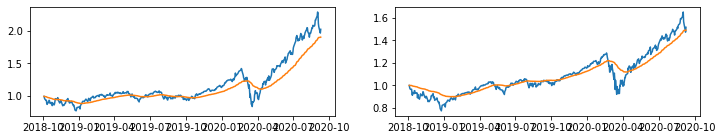

In [16]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(list_of_ETFs[get_index('ARKW')]['Close'][d-1:]/list_of_ETFs[get_index('ARKW')]['Close'][d-1])
plt.plot(EMAs['ARKW']/EMAs['ARKW'][0])

plt.subplot(1,2,2)
plt.plot(list_of_ETFs[get_index('QQQ')]['Close'][d-1:]/list_of_ETFs[get_index('QQQ')]['Close'][d-1])
plt.plot(EMAs['QQQ']/EMAs['QQQ'][0])

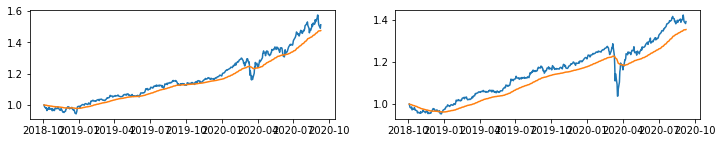

In [17]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(portfolio_Preliminary['Close'][d-1:]/portfolio_Preliminary['Close'][d-1])
plt.plot(EMAs['Preliminary']/EMAs['Preliminary'][0])

plt.subplot(1,2,2)
plt.plot(portfolio_RayDalio['Close'][d-1:]/portfolio_RayDalio['Close'][d-1])
plt.plot(EMAs['RayDalio']/EMAs['RayDalio'][0])

In [18]:
# performace measure similar to Sharpe Ratio
# measure = normalized gain  / ( normalzied std + epsilon)
epsilon = 0.003  # fractional tolerable volatility
dd = 100 # performance measure duration 

def get_performance_based_on_EMA(asset_hist):
  EMA = get_EMA(asset_hist)
  DIFF = asset_hist[d-1:]/EMA - 1.0
  performance = []
  for i in range(len(EMA)-dd):
    performance.append( (asset_hist[d-1+i+dd]/asset_hist[d-1+i]-1.0) / (np.std(DIFF[i:i+dd])+epsilon) )
  return np.mean(performance)/(np.std(performance)+epsilon)

In [19]:
print('ARKW performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('ARKW')]['Close']) )
print('QQQ  performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('QQQ') ]['Close']) )
print('VOO  performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('VOO') ]['Close']) )
print('RayDalio performace:',  get_performance_based_on_EMA(portfolio_RayDalio['Close']))
print('Preliminary performace:',  get_performance_based_on_EMA(portfolio_Preliminary['Close']))

ARKW performace: 0.712463363440914
QQQ  performace: 0.9841410038763215
VOO  performace: 0.8336182968393527
RayDalio performace: 1.652033509887298
Preliminary performace: 2.897502763034789


### Optimize portfolio: 

In [20]:
from scipy import optimize
from copy import deepcopy as copy

In [21]:
def obj(asset_fraction):
  asset_fraction_tmp = np.array(asset_fraction)
  asset_fraction_tmp = asset_fraction_tmp/np.sum(asset_fraction_tmp)
  portfolio = get_portfolio(asset_fraction_tmp)
  performance = get_performance_based_on_EMA(portfolio['Close'])
  return -performance

In [22]:
list_of_ETF_names

['ARKW',
 'DWSH',
 'QQQ',
 'VOO',
 'IAU',
 'LTPZ',
 'VT',
 'EDV',
 'VCLT',
 'EMLC',
 'DBC',
 'UVXY',
 'IEHS',
 'JNJ']

In [23]:
bounds = [(0.0,1.0),  #ARKW
          (0.0,1.0),  #DWSGH
          (0.0,1.0),  #QQQ
          (0.1,1.0),  #VOO
          (0.0,1.0),  #IAU
          (0.0,1.0),  #LTPZ
          (0.0,1.0),  #VT
          (0.0,1.0),  #EDV  Vanguard Extended Duration Treasury Zero-Coupon Bond ETF
          (0.0,1.0),  #VCLT Vanguard Long-Term Corporate Bond
          (0.0,1.0),  #EMLC Emerging market Gov Bond denominated in local currencies
          (0.0,1.0),  #DBC  Invesco Commodity Index
          (0.0,1.0),  #UVXY 2x VIX
          (0.0,1.0),
          (0.0,1.0)
          ]

In [24]:
# result = optimize.differential_evolution(obj,bounds,disp=True,popsize=20,workers=30)

In [25]:
# asset_fraction = result.x/np.sum(result.x)

asset_fraction = np.array(
    [0.14183966, 0.02810488, 0.15952736, 0.019334  , 0.17719674,
       0.        , 0.        , 0.19334004, 0.        , 0.09269265,
       0.        , 0.02106045, 0.06196416, 0.10494005])

# asset_fraction = asset_fraction/np.sum(asset_fraction)

In [26]:
asset_fraction

array([0.14183966, 0.02810488, 0.15952736, 0.019334  , 0.17719674,
       0.        , 0.        , 0.19334004, 0.        , 0.09269265,
       0.        , 0.02106045, 0.06196416, 0.10494005])

In [27]:
for i,ETFname in enumerate(list_of_ETF_names):
    print(ETFname,asset_fraction[i])

ARKW 0.14183966
DWSH 0.02810488
QQQ 0.15952736
VOO 0.019334
IAU 0.17719674
LTPZ 0.0
VT 0.0
EDV 0.19334004
VCLT 0.0
EMLC 0.09269265
DBC 0.0
UVXY 0.02106045
IEHS 0.06196416
JNJ 0.10494005


In [28]:
portfolio = get_portfolio(asset_fraction)

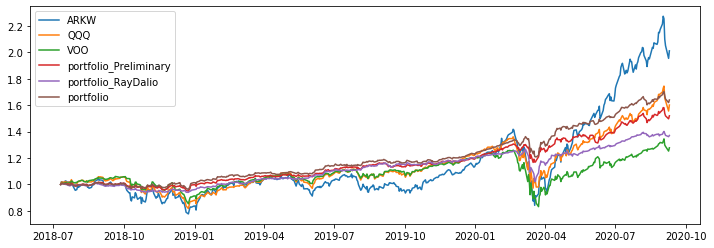

In [29]:
plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close']/item['Close'][0])

plt.plot(portfolio_Preliminary['Close']/portfolio_Preliminary['Close'][0])
plt.plot(portfolio_RayDalio['Close']/portfolio_RayDalio['Close'][0])
plt.plot(portfolio['Close']/portfolio['Close'][0])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio',
            'portfolio'])

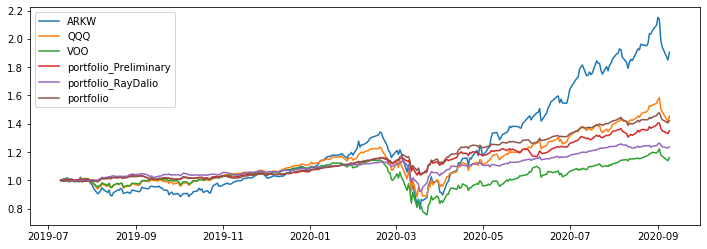

In [30]:
d_from = 250

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(portfolio_Preliminary['Close'][d_from:]/portfolio_Preliminary['Close'][d_from])
plt.plot(portfolio_RayDalio['Close'][d_from:]/portfolio_RayDalio['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio',
            'portfolio'])

2020-07-23 00:00:00


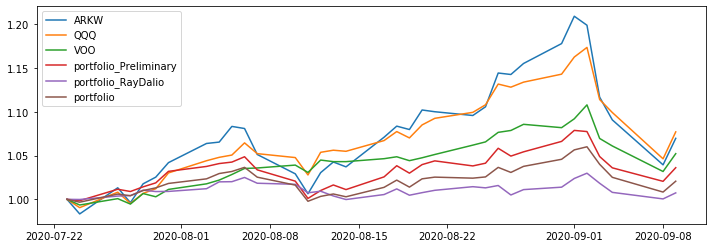

In [53]:
d_from = 512
print(item.index[d_from])

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(portfolio_Preliminary['Close'][d_from:]/portfolio_Preliminary['Close'][d_from])
plt.plot(portfolio_RayDalio['Close'][d_from:]/portfolio_RayDalio['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio',
            'portfolio'])

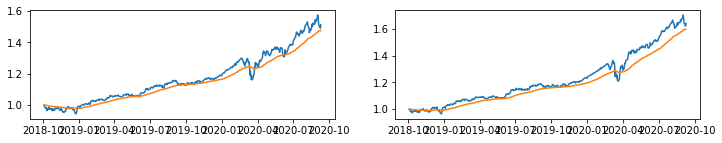

In [32]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(portfolio_Preliminary['Close'][d-1:]/portfolio_Preliminary['Close'][d-1])
plt.plot(EMAs['Preliminary']/EMAs['Preliminary'][0])

EMAs['portfolio']=get_EMA(portfolio['Close'])
plt.subplot(1,2,2)
plt.plot(portfolio['Close'][d-1:]/portfolio['Close'][d-1])
plt.plot(EMAs['portfolio']/EMAs['portfolio'][0])

# From ratio to number of shares

In [33]:
# prices = []
# for ETF in list_of_ETFs:
#     prices.append(ETF['Close'][-1])

In [34]:
prices = []
for ETFname in list_of_ETF_names:
    prices.append(si.get_live_price(ETFname))
    print(ETFname, prices[-1])

ARKW 102.13999938964844
DWSH 17.969999313354492
QQQ 277.8800048828125
VOO 312.2099914550781
IAU 18.600000381469727
LTPZ 87.5199966430664
VT 81.77999877929688
EDV 165.74000549316406
VCLT 107.51000213623047
EMLC 31.440000534057617
DBC 12.9399995803833
UVXY 22.440000534057617
IEHS 33.63800048828125
JNJ 149.6999969482422


In [35]:
len(list_of_ETFs)

14

In [36]:
def get_portfolio_shares(asset_Value,asset_fraction,prices):
    shares = {}
    for i,ETFname in enumerate(list_of_ETF_names):
        shares[ETFname]=asset_Value*asset_fraction[i]/prices[i]
    return shares

### optimized portfolio shares

In [37]:
shares = get_portfolio_shares(20000,asset_fraction,prices)
shares

{'ARKW': 27.773577608690488,
 'DWSH': 31.279778602009984,
 'QQQ': 11.481744436219932,
 'VOO': 1.2385253854236016,
 'IAU': 190.53412512456987,
 'LTPZ': 0.0,
 'VT': 0.0,
 'EDV': 23.330521731878946,
 'VCLT': 0.0,
 'EMLC': 58.96478907472663,
 'DBC': 0.0,
 'UVXY': 18.77045409872977,
 'IEHS': 36.84176175785892,
 'JNJ': 14.020047045997249}

### optimized portfolio shares

In [38]:
shares = get_portfolio_shares(14000.5,0.4*np.array(asset_fraction)+0.6*np.array(asset_fraction_RayDalio),prices)
shares

{'ARKW': 7.776879466209424,
 'DWSH': 8.758650806348816,
 'QQQ': 3.2150032595859437,
 'VOO': 0.3467994931724627,
 'IAU': 75.93291152590824,
 'LTPZ': 19.196298725327924,
 'VT': 35.95139452049376,
 'EDV': 16.66949921829194,
 'VCLT': 5.86012917385744,
 'EMLC': 36.549613836208664,
 'DBC': 32.45865638486818,
 'UVXY': 5.255914852185324,
 'IEHS': 10.316061709818078,
 'JNJ': 3.92575337334969}